In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Importing data
df_customers = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
cust = df_customers.values.T[1]

In [5]:
# Define a function for calculating the mean using bootstrap for 95% CI
def bootstrap_mean(x, n_x, n_b):
  # 1
    temp = np.random.choice(x,(n_b,n_x))
  # 2
    mean = np.mean(temp)
  # 3
    means = np.mean(temp,axis=1)
  # 4
    lower = np.percentile(means, 2.5)
  # 5
    upper = np.percentile(means, 97.5)
    
    return mean, lower, upper

In [16]:
bootstrap_mean(cust,cust.shape[0],1000)

(9.271214285714287, 6.355357142857143, 12.5)

In [8]:
# Calculate the mean and its 95% CI with different bootstrap's number
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(cust, cust.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

In [9]:
# Create a dataframe for the mean 
df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
df_boot

,Bootstrap Iterations,Mean,Value
0,100,9.003571,mean
1,100,6.639286,lower
2,100,12.153571,upper
3,1100,9.187727,mean
4,1100,6.285714,lower
...,...,...,...
145,48100,6.428571,lower
146,48100,12.357143,upper
147,49100,9.224574,mean
148,49100,6.428571,lower


D:\Program\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50000.0)

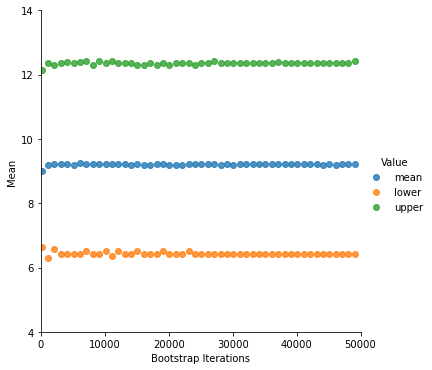

In [13]:
# Plot the means for different number of bootstrap
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(4,14)
sns_plot.axes[0, 0].set_xlim(0, 50000)

sns_plot.savefig("bootstrap_confidence_95.pdf", bbox_inches='tight')

In [14]:
# Define functions for upper and lower bounds
l = lambda x1,x2: np.percentile(x1,(100-x2)/2)
u = lambda x1,x2: np.percentile(x1,100-((100-x2)/2))

In [20]:
# Define a function for calculating the mean using bootstrap for any CI
def bootstrap_mean_ci(x, n_x, n_b, ci):
  # 1
    temp = np.random.choice(x,(n_b,n_x))
  # 2
    mean = np.mean(temp)
  # 3
    means = np.mean(temp,axis=1)
  # 4
    lower = l(means,ci)
  # 5
    upper = u(means,ci)
    
    return mean, lower, upper

In [21]:
bootstrap_mean_ci(cust,cust.shape[0],1000,90)

(9.249357142857143, 6.928571428571429, 11.571428571428571)

In [23]:
# Calculate the mean and its 80% CI with different bootstrap's number
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(cust,cust.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

In [25]:
# Create a dataframe for the mean 
df_boot_ci = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
df_boot_ci

,Boostrap Iterations,Mean,Value
0,100,9.430714,mean
1,100,7.492857,lower
2,100,12.292857,upper
3,1100,9.195844,mean
4,1100,7.285714,lower
...,...,...,...
145,48100,7.285714,lower
146,48100,11.214286,upper
147,49100,9.207934,mean
148,49100,7.285714,lower


D:\Program\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


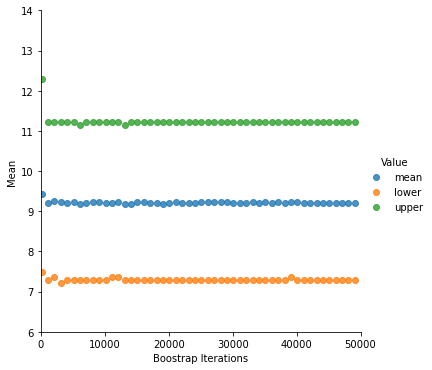

In [27]:
# Plot the means for different number of bootstrap
sns_plot = sns.lmplot(df_boot_ci.columns[0], df_boot_ci.columns[1], data=df_boot_ci, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(6,14)
sns_plot.axes[0, 0].set_xlim(0, 50000)

sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

# Vehicles dataset

In [28]:
# Import dats for Vehicles
df_v = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df_v

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


In [30]:
# convert the columns in dataframe to two separate arrays
current = df_v.values.T[0]
new = df_v.values.T[1]
new = new[np.logical_not(np.isnan(new))]

In [31]:
new

array([24., 27., 27., 25., 31., 35., 24., 19., 28., 23., 27., 20., 22.,
       18., 20., 31., 32., 31., 32., 24., 26., 29., 24., 24., 33., 33.,
       32., 28., 19., 32., 34., 26., 30., 22., 22., 33., 39., 36., 28.,
       27., 21., 24., 30., 34., 32., 38., 37., 30., 31., 37., 32., 47.,
       41., 45., 34., 33., 24., 32., 39., 35., 32., 37., 38., 34., 34.,
       32., 33., 32., 25., 24., 37., 31., 36., 36., 34., 38., 32., 38.,
       32.])

In [33]:
#find means of current and new
current_mean = np.mean(current)
new_mean = np.mean(new)

print('The mean value for Current is: {}, and the mean value for New is: {}'.format(round(current_mean, 3),
                                                                                    round(new_mean,3)))

The mean value for Current is: 20.145, and the mean value for New is: 30.481


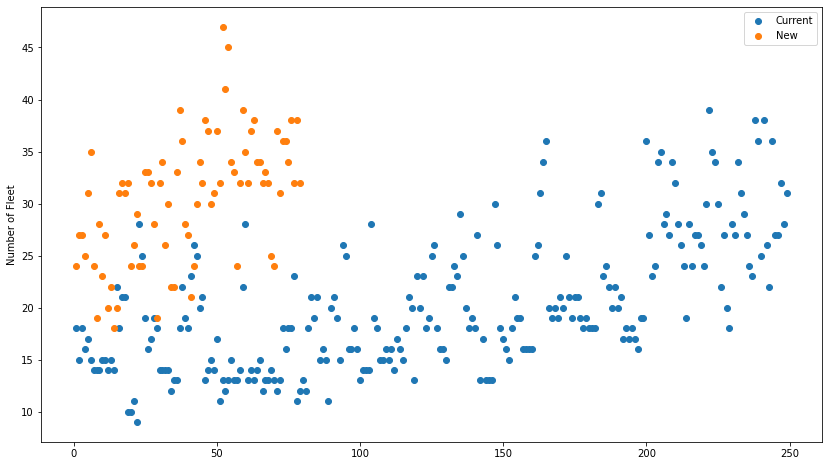

In [36]:
# Plot New and Current in the same figure

x1=np.linspace(1,len(current),current.size)
x2 = np.linspace(1,len(new),new.size)

fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.scatter(x1,current,label="Current")
plt.scatter(x2,new,label="New")
plt.legend()
plt.ylabel("Number of Fleet")
plt.show()

D:\Program\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


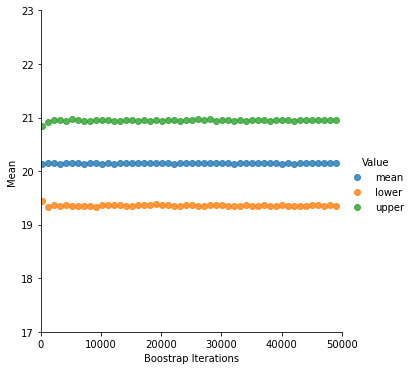

In [40]:
# Calculate the mean and its 95% CI with different bootstrap's number for current fleet

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(current, current.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

# Create a dataframe for the means of current fleet 
df_boot_c = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])

# Plot the mean and the 95% CI for current fleet
sns_plot = sns.lmplot(df_boot_c.columns[0], df_boot_c.columns[1], data=df_boot_c, fit_reg=False, hue="Value")
sns_plot.axes[0, 0].set_ylim(17,23)
sns_plot.axes[0, 0].set_xlim(0, 50000)
sns_plot.savefig("bootstrap_confidence_95_current.pdf", bbox_inches='tight')

D:\Program\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


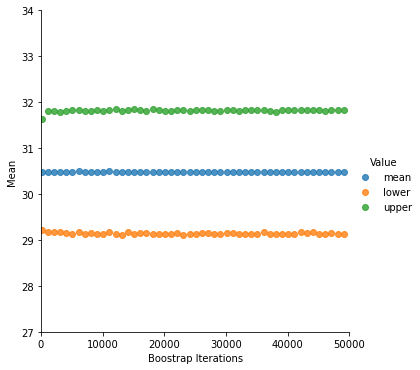

In [43]:
# Calculate the mean and its 95% CI with different bootstrap's number for new fleet

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(new, new.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

# Create a dataframe for the means of new fleet 
df_boot_n = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])

# Plot the mean and the 95% CI for new fleet
sns_plot = sns.lmplot(df_boot_n.columns[0], df_boot_n.columns[1], data=df_boot_n, fit_reg=False, hue="Value")
sns_plot.axes[0, 0].set_ylim(27,34)
sns_plot.axes[0, 0].set_xlim(0, 50000)
sns_plot.savefig("bootstrap_confidence_95_new.pdf", bbox_inches='tight')

In [44]:
def permut_test(sample1, sample2, n_permutations):
    t_obs = np.mean(sample2) - np.mean(sample1)
    c = 0
    t_perm = np.zeros(n_permutations)
    for i in range(n_permutations):
        temp = np.concatenate((sample1, sample2))
        perm = np.random.permutation(temp)
        p_cur = perm[:len(sample1)]
        p_new = perm[len(sample1):]

        p_cur_mean = np.mean(p_cur)
        p_new_mean = np.mean(p_new)

        t_perm[i] = p_new_mean - p_cur_mean
        if t_perm[i]>t_obs:
            c+=1
    p_value = round(c/n_permutations,3)
    
    return p_value, t_perm, t_obs

In [47]:
res = permut_test(current, new, 30000)
print('The p-value is: {},\n The t_obs is: {}, and \n The mean of t_perm is: {}'.format(res[0],res[2],np.mean(res[1]))) 

The p-value is: 0.0,
 The t_obs is: 10.336434344974837, and 
 The mean of t_perm is: -0.0008647450561740757


## Quiz 2

In [48]:
# 60% CI for the mean of the new fleet with 10000 iterations
bootstrap_mean_ci(new,new.shape[0],10000,60)

(30.49949240506329, 29.924050632911392, 31.088607594936704)

In [49]:
# 92% CI for the mean of the old fleet with 10000 iterations
bootstrap_mean_ci(current,current.shape[0],10000,92)

(20.13877309236948, 19.437751004016064, 20.839357429718877)

In [50]:
# Define a function for calculating the standard deviation using bootstrap for any CI
def bootstrap_std_ci(x, n_x, n_b, ci):
  # 1
    temp = np.random.choice(x,(n_b,n_x))
  # 2
    std = np.std(temp)
  # 3
    stds = np.std(temp,axis=1)
  # 4
    lower=l(stds,ci)
  # 5
    upper = u(stds,ci)
    return std, lower, upper

In [51]:
# 95% CI for the std of the customers with 10000 iterations
bootstrap_std_ci(cust, cust.shape[0], 10000, 95)

(5.67459972080653, 2.7217941261796645, 7.36653353211462)

In [52]:
# 73% CI for the std of the new fleet with 10000 iterations
bootstrap_std_ci(new, new.shape[0], 10000, 73)

(6.066605426794786, 5.518104533889033, 6.50519679232881)

In [53]:
# P-value from a permutation test with 30000 permutations between current and new fleet
permut_test(current, new, 30000)

(0.0,
 array([-0.58522698, -0.91871283,  0.41523054, ...,  1.09887652,
         1.43236236,  0.98215647]),
 10.336434344974837)

In [55]:
# Generating data for PA and OH dem vote share

dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20
                , 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75,
                43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39,
                35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88,
                54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79,
                83.56, 40.09, 60.81, 49.81]


dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36,
                45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07,
                39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47,
                47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14,
                34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47,
                49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53,
                36.54, 49.58, 41.97, 38.11]

In [59]:
print('The total number of elements in PA data is: {}, and\n The total number of elements in OH data is: {}'.format(
    np.shape(dem_share_PA)[0],np.shape(dem_share_OH)[0]))

The total number of elements in PA data is: 67, and
 The total number of elements in OH data is: 88


In [60]:
# 98% CI for the mean of the OH with 100000 iterations
bootstrap_mean_ci(dem_share_OH,np.shape(dem_share_OH)[0],100000,98)

(44.31834183977272, 41.891020454545455, 46.74772840909091)

In [61]:
# 98% CI for the mean of the PA with 100000 iterations
bootstrap_mean_ci(dem_share_PA,np.shape(dem_share_PA)[0],100000,98)

(45.47541971492538, 42.77746119402986, 48.33657910447761)

In [62]:
# P-value from a permutation test with 30000 permutations between PA and OH dem vote share
permut_test(dem_share_OH, dem_share_PA, 30000)

(0.237,
 array([-0.06367707,  3.83209125,  1.37774932, ..., -1.0290095 ,
         0.1308616 ,  1.2058192 ]),
 1.1582360922659447)